In [2]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

<Figure size 432x288 with 0 Axes>

In [3]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 11])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

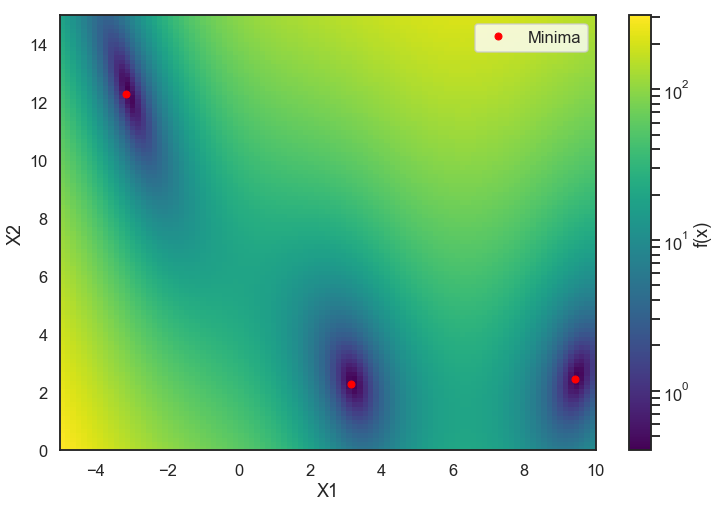

In [4]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [5]:
ntrain = 500 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [6]:
opt = Optimizer(bounds, base_estimator="gp", acq_func = 'RuiEI',
                acq_optimizer = 'sampling', random_state = 123)

RuiEI aquisition function (parallel BGO) is still under development
----------------------------------------
Right now, it can only be used with sampling acq_optimizer


In [7]:
opt.acq_optimizer

'sampling'

In [8]:
opt.tell(X_train.tolist(), Y_train.tolist())

we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.


          fun: 0.5041852448099746
    func_vals: array([ 71.42801526,   6.5590623 ,  21.35667714,  47.21753534,
       102.06699278,  28.18045155,  10.78563773,  47.87856911,
        50.82292568, 132.71480002,  23.57686332,  30.59904501,
        10.3626141 ,  63.23861349,  24.03202862,  11.49840998,
       143.12931299,  61.81806261,  10.80135053,  28.44401395,
        28.42213382,   1.12069151, 146.3223977 ,  54.57847719,
       179.38922602,  26.60363624,  29.70975575, 104.40012407,
       110.89348513,  52.71813616,  18.87412247,  68.07632418,
        89.02260203,  15.2631475 ,  11.83011193, 165.10252008,
        49.70074359,  17.52459929, 107.33913329,  24.7049005 ,
        37.05278824,  83.25938969,  22.74347587,  19.21010399,
       143.81773492,  46.68308626,   1.56638671,   1.05411363,
       131.46639775,   0.86661859,  46.986303  ,  10.70777203,
         7.39117035,   2.43787794, 106.36099249,   1.97717826,
        18.66745157, 222.30683188,  29.98208337,  13.31067664,
      

In [15]:
qei_args_dict = {'num_sampled_points': 3,
               'num_batches_eval' : 4000,
               'strategy_batch_selection' : 'random'}

rui_ei_args_dict = {'num_sampled_points': 5}

In [16]:
r = opt.ask(n_points= None, additional_acq_func_kwargs = rui_ei_args_dict)

we are here :: 1
we are here :: 2
1


In [18]:
from skopt.acquisition import gaussian_ei

In [20]:
model = opt.models[-1]
y_opt = np.min()

In [ ]:
# Calculate EI for grid points in the space
values, mu, std = gaussian_ei(X = opt.Xspace, model = model, y_opt = y_opt)

NameError: name 'model' is not defined

IndexError: too many indices for array

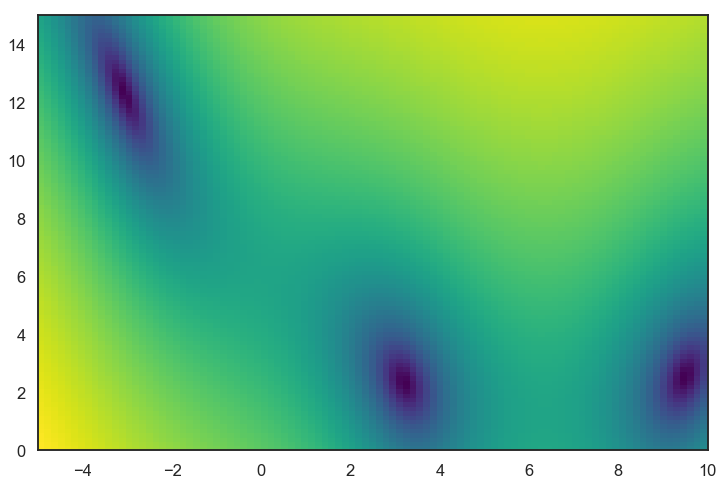

In [14]:
plot_branin_with_points(np.array(r))

In [ ]:
opt.base_estimator_

In [ ]:
model = opt.models[-1]

In [ ]:
x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
X_grid = np.zeros(shape = (x_ax.ravel().shape[0], 2))
X_grid[:,0] = x_ax.ravel()
X_grid[:,1] = y_ax.ravel()

In [ ]:
x_model = opt.space.transform(X_grid.tolist())

In [ ]:
y_pred, sigma = model.predict(x_model, return_std=True)

In [ ]:
def plot_branin_pred(y_pred, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(y_pred, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=2, 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("m(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])
    
    
def plot_branin_var(sigma, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(sigma, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("sigma(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

In [ ]:
plot_branin_pred(y_pred, x1_values, x2_values)

In [ ]:
plot_branin_var(sigma, x1_values, x2_values)

In [ ]:
x1_values

In [ ]:
opt.Xspace.shape